In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

seed = 7
numpy.random.seed(seed)

Using Theano backend.


NameError: name 'numpy' is not defined

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

trainX = train.drop(['label'],axis=1).values.astype('float32')
trainY = train['label'].values

testX = test.values.astype('float32')

trainX = trainX.reshape(trainX.shape[0],1,28,28).astype('float32')
testX = testX.reshape(testX.shape[0],1,28,28).astype('float32')

trainX = trainX/255
testX = testX/255

trainY = np_utils.to_categorical(trainY)

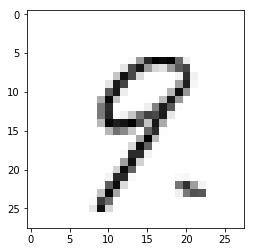

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(testX[2,0,:,:],cmap='gray_r')

In [17]:
def build_model():
    model = Sequential()
    model.add(Convolution2D(30,5,5,border_mode='valid',input_shape=(1,28,28),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Convolution2D(15,3,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(trainY.shape[1],activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [18]:
model = build_model()
model.fit(trainX,trainY,batch_size=128,verbose=2,nb_epoch=30,validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
22s - loss: 0.5089 - acc: 0.8393 - val_loss: 0.1258 - val_acc: 0.9642
Epoch 2/30
23s - loss: 0.1271 - acc: 0.9608 - val_loss: 0.0685 - val_acc: 0.9783
Epoch 3/30
24s - loss: 0.0861 - acc: 0.9740 - val_loss: 0.0591 - val_acc: 0.9793
Epoch 4/30
23s - loss: 0.0705 - acc: 0.9779 - val_loss: 0.0494 - val_acc: 0.9837
Epoch 5/30
23s - loss: 0.0611 - acc: 0.9808 - val_loss: 0.0470 - val_acc: 0.9858
Epoch 6/30
23s - loss: 0.0493 - acc: 0.9843 - val_loss: 0.0427 - val_acc: 0.9852
Epoch 7/30
23s - loss: 0.0473 - acc: 0.9845 - val_loss: 0.0391 - val_acc: 0.9870
Epoch 8/30
23s - loss: 0.0425 - acc: 0.9865 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 9/30
23s - loss: 0.0411 - acc: 0.9865 - val_loss: 0.0358 - val_acc: 0.9889
Epoch 10/30
22s - loss: 0.0367 - acc: 0.9877 - val_loss: 0.0355 - val_acc: 0.9880
Epoch 11/30
23s - loss: 0.0328 - acc: 0.9896 - val_loss: 0.0397 - val_acc: 0.9860
Epoch 12/30
23s - loss: 0.0307 - acc: 0.9896 - val_loss: 0

In [14]:
yPred = model.predict_classes(testX,verbose=2,batch_size=32)

In [15]:
print yPred

[2 0 9 ..., 3 9 2]


In [16]:
np.savetxt("output2.csv",np.c_[range(1,len(yPred)+1),yPred],delimiter=',',comments='',header='ImageId,Label',fmt='%d')